# DS 3 Project -  Get Billboard Data and Lyrics

### Import Necessary libraries

In [5]:
# !pip install lyricsgenius
# !pip install billboard.py
# !pip install textblob
# !pip install wordcloud
# !pip install ipywidgets

In [1]:
import requests
import json
import pandas as pd

import base64
import billboard

import pandas as pd

from time import sleep
import requests
from bs4 import BeautifulSoup

import re

import pandas as pd
from collections import Counter
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import lyricsgenius

import time


import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


from wordcloud import WordCloud
import matplotlib.pyplot as plt


nltk.download('vader_lexicon')

from collections import defaultdict
from textblob import TextBlob

import plotly.graph_objs as go
from plotly.subplots import make_subplots

from IPython.display import clear_output, display, Image
from wordcloud import WordCloud
import io
import ipywidgets as widgets  # Import the ipywidgets module

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/madhvimalhotra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/madhvimalhotra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/madhvimalhotra/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Fetching data from Year -end Top 100 Songs for 10 Years

## (https://www.billboard.com/charts/year-end/2023/hot-100-songs/)

In [3]:
# Define years for which to fetch data
years = [2013,2014,2015,2016,2017,2018, 2019, 2020, 2021, 2022, 2023]

# Initialize an empty list to store data
all_data = []

# Fetch data for each year
for year in years:
    chart = billboard.ChartData(f'year-end/{year}/hot-100-songs')

    # Extract data for each song
    for song in chart:
        all_data.append({
            'Year': year,
            'Title': song.title,
            'Artist': song.artist,
            'Rank': song.rank
        })


In [4]:
# Creating a DataFrame from the collected data
df = pd.DataFrame(all_data)

# Display the DataFrame
df.head()

,Year,Title,Artist,Rank
0,2013,Thrift Shop,Macklemore & Ryan Lewis Featuring Wanz,1
1,2013,Blurred Lines,Robin Thicke Featuring T.I. + Pharrell,2
2,2013,Radioactive,Imagine Dragons,3
3,2013,Harlem Shake,Baauer,4
4,2013,Can't Hold Us,Macklemore & Ryan Lewis Featuring Ray Dalton,5


In [5]:
df.shape

(1099, 4)

In [6]:
# Finding unique songs
unique_songs_df = df.drop_duplicates(subset=['Title', 'Artist'])

# Counting the number of unique songs
num_unique_songs = len(unique_songs_df)

print(f"Number of unique songs: {num_unique_songs}")

Number of unique songs: 987


# Get Lyrics using Genius API

In [7]:
genius = lyricsgenius.Genius("MY_API_KEY")

In [4]:
# Function to fetch lyrics for a given song
def get_lyrics_from_genius(song_title, artist_name):
    try:
        song = genius.search_song(song_title, artist_name)
        return song.lyrics if song else "Lyrics Not Found"
    except Exception as e:
        return f"Error: {e}"

In [13]:
# Fetch lyrics for unique songs
lyrics_data = []

for index, row in unique_songs_df.iterrows():
    lyrics = get_lyrics_from_genius(row['Title'], row['Artist'])
    lyrics_data.append({'Title': row['Title'], 'Artist': row['Artist'], 'Lyrics': lyrics})

    # Optional: Print progress
    if index % 100 == 0:
        print(f"Processed {index} songs")

    # Optional: Delay to avoid rate limits
    time.sleep(1)

Searching for "Thrift Shop" by Macklemore & Ryan Lewis Featuring Wanz...
Done.
Processed 0 songs
Searching for "Blurred Lines" by Robin Thicke Featuring T.I. + Pharrell...
Done.
Searching for "Radioactive" by Imagine Dragons...
Done.
Searching for "Harlem Shake" by Baauer...
Done.
Searching for "Can't Hold Us" by Macklemore & Ryan Lewis Featuring Ray Dalton...
Done.
Searching for "Mirrors" by Justin Timberlake...
Done.
Searching for "Just Give Me A Reason" by P!nk Featuring Nate Ruess...
Done.
Searching for "When I Was Your Man" by Bruno Mars...
Done.
Searching for "Cruise" by Florida Georgia Line Featuring Nelly...
Done.
Searching for "Roar" by Katy Perry...
Done.
Searching for "Locked Out Of Heaven" by Bruno Mars...
Done.
Searching for "Ho Hey" by The Lumineers...
Done.
Searching for "Stay" by Rihanna Featuring Mikky Ekko...
Done.
Searching for "Get Lucky" by Daft Punk Featuring Pharrell Williams...
Done.
Searching for "Royals" by Lorde...
Searching for "I Knew You Were Trouble." by 

Done.
Searching for "Bailando" by Enrique Iglesias Featuring Descemer Bueno & Gente de Zona...
Done.
Searching for "Burn" by Ellie Goulding...
Done.
Searching for "Wiggle" by Jason Derulo Featuring Snoop Dogg...
Done.
Searching for "Rather Be" by Clean Bandit Featuring Jess Glynne...
Done.
Searching for "Don't Tell 'Em" by Jeremih Featuring YG...
Done.
Searching for "Show Me" by Kid Ink Featuring Chris Brown...
Done.
Searching for "Not A Bad Thing" by Justin Timberlake...
Done.
Searching for "Ain't It Fun" by Paramore...
Done.
Searching for "The Man" by Aloe Blacc...
Done.
Searching for "This Is How We Roll" by Florida Georgia Line Featuring Luke Bryan...
Done.
Searching for "Classic" by MKTO...
Done.
Searching for "A Sky Full Of Stars" by Coldplay...
Done.
Searching for "Don't" by Ed Sheeran...
Searching for "Na Na" by Trey Songz...
Done.
Searching for "Hot Boy" by Bobby Shmurda...
Done.
Searching for "Sing" by Ed Sheeran...
Searching for "My Hitta" by YG Featuring Jeezy & Rich Homie 

Done.
Searching for "Hit The Quan" by iLoveMemphis...
Done.
Searching for "Downtown" by Macklemore & Ryan Lewis Featuring Eric Nally, Melle Mel, Kool Moe Dee & Grandmaster Caz...
Done.
Searching for "House Party" by Sam Hunt...
Done.
Searching for "Ayo" by Chris Brown & Tyga...
Done.
Searching for "Kick The Dust Up" by Luke Bryan...
Done.
Searching for "Blessings" by Big Sean Featuring Drake...
Done.
Searching for "Budapest" by George Ezra...
Done.
Searching for "Heartbeat Song" by Kelly Clarkson...
Done.
Searching for "Ghost" by Ella Henderson...
Done.
Searching for "Here" by Alessia Cara...
Done.
Searching for "Waves" by Mr. Probz...
Done.
Searching for "El Perdon (Forgiveness)" by Nicky Jam & Enrique Iglesias...
Done.
Searching for "She Knows" by Ne-Yo Featuring Juicy J...
Done.
Searching for "Night Changes" by One Direction...
Done.
Searching for "Back To Back" by Drake...
Done.
Searching for "How Deep Is Your Love" by Calvin Harris & Disciples...
Done.
Searching for "Love Yourself

Done.
Searching for "Fake Love" by Drake...
Done.
Searching for "Don't Wanna Know" by Maroon 5 Featuring Kendrick Lamar...
Done.
Searching for "Look What You Made Me Do" by Taylor Swift...
Done.
Searching for "Castle On The Hill" by Ed Sheeran...
Done.
Searching for "Bad Things" by Machine Gun Kelly x Camila Cabello...
Done.
Searching for "Paris" by The Chainsmokers...
Done.
Searching for "Rockabye" by Clean Bandit Featuring Sean Paul & Anne-Marie...
Done.
Searching for "Feel It Still" by Portugal. The Man...
Done.
Searching for "Sorry Not Sorry" by Demi Lovato...
Done.
Searching for "Bank Account" by 21 Savage...
Searching for "Mi Gente" by J Balvin & Willy William Featuring Beyonce...
Done.
Searching for "Thunder" by Imagine Dragons...
Done.
Searching for "T-Shirt" by Migos...
Done.
Searching for "Rake It Up" by Yo Gotti Featuring Nicki Minaj...
Done.
Searching for "Mercy" by Shawn Mendes...
Done.
Searching for "Tunnel Vision" by Kodak Black...
Done.
Searching for "Rockstar" by Post 

Done.
Searching for "Mercy" by Brett Young...
Done.
Searching for "One Number Away" by Luke Combs...
Done.
Searching for "Powerglide" by Rae Sremmurd & Juicy J...
Done.
Searching for "IDGAF" by Dua Lipa...
Done.
Searching for "Old Town Road" by Lil Nas X Featuring Billy Ray Cyrus...
Done.
Searching for "Sunflower (Spider-Man: Into The Spider-Verse)" by Post Malone & Swae Lee...
Done.
Processed 600 songs
Searching for "Without Me" by Halsey...
Done.
Searching for "Bad Guy" by Billie Eilish...
Searching for "Wow." by Post Malone...
Done.
Searching for "7 Rings" by Ariana Grande...
Done.
Searching for "Talk" by Khalid...
Done.
Searching for "Sucker" by Jonas Brothers...
Done.
Searching for "High Hopes" by Panic! At The Disco...
Done.
Searching for "Thank U, Next" by Ariana Grande...
Searching for "Truth Hurts" by Lizzo...
Done.
Searching for "Dancing With A Stranger" by Sam Smith & Normani...
Done.
Searching for "Senorita" by Shawn Mendes & Camila Cabello...
Done.
Searching for "I Don't C

Done.
Searching for "Come & Go" by Juice WRLD x Marshmello...
Done.
Searching for "If The World Was Ending" by JP Saxe Featuring Julia Michaels...
Done.
Searching for "We Paid" by Lil Baby & 42 Dugg...
Done.
Searching for "Yummy" by Justin Bieber...
Done.
Searching for "One Man Band" by Old Dominion...
Done.
Searching for "Got What I Got" by Jason Aldean...
Done.
Searching for "Sunday Best" by Surfaces...
Done.
Searching for "Godzilla" by Eminem Featuring Juice WRLD...
Done.
Searching for "Bandit" by Juice WRLD & YoungBoy Never Broke Again...
Done.
Searching for "Party Girl" by StaySolidRocky...
Done.
Searching for "Die From A Broken Heart" by Maddie & Tae...
Done.
Searching for "Popstar" by DJ Khaled Featuring Drake...
Done.
Searching for "All I Want For Christmas Is You" by Mariah Carey...
Done.
Searching for "One Of Them Girls" by Lee Brice...
Done.
Searching for "Hard To Forget" by Sam Hunt...
Done.
Searching for "One Margarita" by Luke Bryan...
Done.
Searching for "Hot" by Young T

Done.
Searching for "Todo de Ti" by Rauw Alejandro...
Done.
Searching for "As It Was" by Harry Styles...
Done.
Processed 900 songs
Searching for "Easy On Me" by Adele...
Done.
Searching for "Shivers" by Ed Sheeran...
Done.
Searching for "First Class" by Jack Harlow...
Done.
Searching for "Big Energy" by Latto...
Done.
Searching for "Ghost" by Justin Bieber...
Done.
Searching for "Super Gremlin" by Kodak Black...
Done.
Searching for "Cold Heart (PNAU Remix)" by Elton John & Dua Lipa...
Done.
Searching for "Wait For U" by Future Featuring Drake & Tems...
Done.
Searching for "About Damn Time" by Lizzo...
Done.
Searching for "Thats What I Want" by Lil Nas X...
Done.
Searching for "Enemy" by Imagine Dragons X JID...
Done.
Searching for "abcdefu" by GAYLE...
Done.
Searching for "Wasted On You" by Morgan Wallen...
Done.
Searching for "Me Porto Bonito" by Bad Bunny & Chencho Corleone...
Done.
Searching for "Woman" by Doja Cat...
Done.
Searching for "Titi Me Pregunto" by Bad Bunny...
Done.
Sear

Done.
Searching for "Dancin' In The Country" by Tyler Hubbard...
Done.
Searching for "Daylight" by David Kushner...
Done.
Searching for "Lift Me Up" by Rihanna...
Done.
Searching for "Eyes Closed" by Ed Sheeran...
Done.
Searching for "TQG" by Karol G x Shakira...
Done.
Searching for "Try That In A Small Town" by Jason Aldean...
Done.
Searching for "Tennessee Orange" by Megan Moroney...
Done.
Searching for "Princess Diana" by Ice Spice & Nicki Minaj...
Done.
Searching for "Tomorrow 2" by GloRilla & Cardi B...
Done.
Searching for "Where She Goes" by Bad Bunny...
Done.
Searching for "Bebe Dame" by Fuerza Regida X Grupo Frontera...
Done.
Searching for "I Remember Everything" by Zach Bryan Featuring Kacey Musgraves...
Done.
Searching for "What It Is (Block Boy)" by Doechii Featuring Kodak Black...
Done.
Searching for "Nobody Gets Me" by SZA...
Done.
Searching for "Rich Men North Of Richmond" by Oliver Anthony Music...
Done.
Searching for "Dial Drunk" by Noah Kahan With Post Malone...
Done.


In [14]:
# Create DataFrame for lyrics
unique_lyrics_df = pd.DataFrame(lyrics_data)

In [17]:
# Check for missing values in the 'Title' and 'Artist' columns
missing_titles = unique_lyrics_df['Title'].isnull().sum()
missing_artists = unique_lyrics_df['Artist'].isnull().sum()

# Check for entries where lyrics were not found
missing_lyrics = unique_lyrics_df['Lyrics'].isna().sum() + (unique_lyrics_df['Lyrics'] == 'Lyrics Not Found').sum()

# Summary of the DataFrame
df_summary = unique_lyrics_df.info()

print(f"Missing Titles: {missing_titles}")
print(f"Missing Artists: {missing_artists}")
print(f"Missing Lyrics: {missing_lyrics}")
print(df_summary)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   987 non-null    object
 1   Artist  987 non-null    object
 2   Lyrics  987 non-null    object
dtypes: object(3)
memory usage: 23.3+ KB
Missing Titles: 0
Missing Artists: 0
Missing Lyrics: 6
None


In [24]:
unique_lyrics_df['Artist'].value_counts()

Drake                             15
Taylor Swift                      14
Luke Combs                        13
Morgan Wallen                     13
Ed Sheeran                        11
                                  ..
Zara Larsson & MNEK                1
James Bay                          1
gnash Featuring Olivia O'Brien     1
Drake & Future                     1
Latto Featuring Cardi B            1
Name: Artist, Length: 650, dtype: int64

In [25]:
# Merge lyrics back into the original dataset
merged_df = df.merge(unique_lyrics_df, on=['Title', 'Artist'], how='left')


# Display the merged DataFrame
print(merged_df.head())


   Year          Title                                        Artist  Rank  \
0  2013    Thrift Shop        Macklemore & Ryan Lewis Featuring Wanz     1   
1  2013  Blurred Lines        Robin Thicke Featuring T.I. + Pharrell     2   
2  2013    Radioactive                               Imagine Dragons     3   
3  2013   Harlem Shake                                        Baauer     4   
4  2013  Can't Hold Us  Macklemore & Ryan Lewis Featuring Ray Dalton     5   

                                              Lyrics  
0  331 ContributorsTranslationsFrançaisThrift Sho...  
1  240 ContributorsTranslationsPortuguêsBlurred L...  
2  180 ContributorsTranslationsPortuguêsDeutschEs...  
3  36 ContributorsHarlem Shake Lyrics[Pre-Chorus]...  
4  5 ContributorsRadio Hamburg TOP 825 Lyrics825 ...  


In [27]:
# Count the occurrences of each year in the merged DataFrame
year_counts = merged_df['Year'].value_counts()

print(year_counts)


2013    100
2014    100
2015    100
2017    100
2018    100
2019    100
2020    100
2021    100
2022    100
2023    100
2016     99
Name: Year, dtype: int64


In [28]:
merged_df.shape

(1099, 5)

In [30]:
merged_df.tail()

,Year,Title,Artist,Rank,Lyrics
1094,2023,"Bzrp Music Sessions, Vol. 53",Bizarrap & Shakira,96,47 ContributorsTranslationsEnglishDeutschFranç...
1095,2023,Meltdown,Travis Scott Featuring Drake,97,6 ContributorsTranslationsEnglishEspañolTürkçe...
1096,2023,Put It On Da Floor Again,Latto Featuring Cardi B,98,61 ContributorsPut It On Da Floor Again Lyrics...
1097,2023,Bloody Mary,Lady Gaga,99,111 ContributorsTranslationsEspañolPortuguêsČe...
1098,2023,Watermelon Moonshine,Lainey Wilson,100,9 ContributorsWatermelon Moonshine Lyrics[Vers...


In [31]:
# Save merged DataFrame to a file (optional but recommended)
merged_df.to_csv('full_song_data_with_lyrics.csv', index=True)


In [5]:
# Read the  file into a DataFrame with a different encoding
cleaned_df = pd.read_csv('full_song_data_with_lyrics.csv', encoding='ISO-8859-1')

In [6]:
cleaned_df.shape

(1099, 5)

In [7]:
cleaned_df.head()

,Year,Title,Artist,Rank,Lyrics
0,2013,Thrift Shop,Macklemore & Ryan Lewis Featuring Wanz,1,331 ContributorsTranslationsFranÃ§aisThrift Sh...
1,2013,Blurred Lines,Robin Thicke Featuring T.I. + Pharrell,2,240 ContributorsTranslationsPortuguÃªsBlurred ...
2,2013,Radioactive,Imagine Dragons,3,180 ContributorsTranslationsPortuguÃªsDeutschE...
3,2013,Harlem Shake,Baauer,4,36 ContributorsHarlem Shake Lyrics[Pre-Chorus]...
4,2013,Can't Hold Us,Macklemore & Ryan Lewis Featuring Ray Dalton,5,234 Contributors\n\n\n[Intro: Macklemore]\nHey...


In [8]:
# Check for 'Lyrics Not Found' or other error indicators in the Lyrics column
not_found_count = cleaned_df['Lyrics'].str.contains('Lyrics Not Found').sum()
error_count = cleaned_df['Lyrics'].str.contains('Error:').sum() # If you used an error message like 'Error:'

print(f"Number of songs with 'Lyrics Not Found': {not_found_count}")
print(f"Number of songs with errors in lyrics: {error_count}")

# Optionally, list the songs with missing or erroneous lyrics
missing_or_error_lyrics = cleaned_df[cleaned_df['Lyrics'].str.contains('Lyrics Not Found') | cleaned_df['Lyrics'].str.contains('Error:')]
missing_or_error_lyrics[['Title', 'Artist', 'Lyrics']]


Number of songs with 'Lyrics Not Found': 0
Number of songs with errors in lyrics: 41


,Title,Artist,Lyrics
120,Let It Go,Idina Menzel,Error: Request timed out:\nHTTPSConnectionPool...
127,Latch,Disclosure Featuring Sam Smith,Error: Request timed out:\nHTTPSConnectionPool...
133,Boom Clap,Charli XCX,Error: Request timed out:\nHTTPSConnectionPool...
143,Wrecking Ball,Miley Cyrus,Error: Request timed out:\nHTTPSConnectionPool...
151,Don't,Ed Sheeran,Error: Request timed out:\nHTTPSConnectionPool...
154,"Hold On, We're Going Home",Drake Featuring Majid Jordan,Error: Request timed out:\nHTTPSConnectionPool...
155,Sing,Ed Sheeran,Error: Request timed out:\nHTTPSConnectionPool...
192,She Looks So Perfect,5 Seconds Of Summer,Error: Request timed out:\nHTTPSConnectionPool...
203,Trap Queen,Fetty Wap,Error: Request timed out:\nHTTPSConnectionPool...
213,Take Me To Church,Hozier,Error: Request timed out:\nHTTPSConnectionPool...


In [9]:
# Subset DataFrame with songs that had errors in fetching lyrics
songs_to_retry = cleaned_df[cleaned_df['Lyrics'].str.contains('Error:')]

# Retry fetching lyrics for these songs
for index, row in songs_to_retry.iterrows():
    try:
        new_lyrics = get_lyrics_from_genius(row['Title'], row['Artist'])
        cleaned_df.at[index, 'Lyrics'] = new_lyrics  # Update the main DataFrame
    except Exception as e:
        print(f"Failed to fetch lyrics for {row['Title']} by {row['Artist']}: {e}")

    # Optional: Delay to avoid rate limits
    time.sleep(1)

# Check if there are still errors after retry
error_count_after_retry = cleaned_df['Lyrics'].str.contains('Error:').sum()
print(f"Number of songs with errors in lyrics after retry: {error_count_after_retry}")


Searching for "Let It Go" by Idina Menzel...
Done.
Searching for "Latch" by Disclosure Featuring Sam Smith...
Done.
Searching for "Boom Clap" by Charli XCX...
Done.
Searching for "Wrecking Ball" by Miley Cyrus...
Done.
Searching for "Don't" by Ed Sheeran...
Done.
Searching for "Hold On, We're Going Home" by Drake Featuring Majid Jordan...
Done.
Searching for "Sing" by Ed Sheeran...
Done.
Searching for "She Looks So Perfect" by 5 Seconds Of Summer...
Done.
Searching for "Trap Queen" by Fetty Wap...
Done.
Searching for "Take Me To Church" by Hozier...
Searching for "Don't" by Ed Sheeran...
Done.
Searching for "Love Yourself" by Justin Bieber...
Searching for "Sorry" by Justin Bieber...
Searching for "Panda" by Desiigner...
Done.
Searching for "Can't Stop The Feeling!" by Justin Timberlake...
Searching for "Cake By The Ocean" by DNCE...
Searching for "Cold Water" by Major Lazer Featuring Justin Bieber & MO...
Done.
Searching for "Treat You Better" by Shawn Mendes...
Done.
Searching for "M

In [18]:
# Subset DataFrame for the remaining 9 songs with errors
songs_to_retry_again = cleaned_df[cleaned_df['Lyrics'].str.contains('Error:')]

# Retry fetching lyrics for these songs
for index, row in songs_to_retry_again.iterrows():
    try:
        new_lyrics = get_lyrics_from_genius(row['Title'], row['Artist'])
        cleaned_df.at[index, 'Lyrics'] = new_lyrics  # Update the main DataFrame
    except Exception as e:
        print(f"Still failed to fetch lyrics for {row['Title']} by {row['Artist']}: {e}")

    # Optional: Delay to avoid rate limits
    time.sleep(1)

# Check if there are still errors after the second retry
error_count_after_second_retry = cleaned_df['Lyrics'].str.contains('Error:').sum()
print(f"Number of songs with errors in lyrics after second retry: {error_count_after_second_retry}")


Number of songs with errors in lyrics after second retry: 0


In [19]:
cleaned_df.head()

,Year,Title,Artist,Rank,Lyrics
0,2013,Thrift Shop,Macklemore & Ryan Lewis Featuring Wanz,1,331 ContributorsTranslationsFranÃ§aisThrift Sh...
1,2013,Blurred Lines,Robin Thicke Featuring T.I. + Pharrell,2,240 ContributorsTranslationsPortuguÃªsBlurred ...
2,2013,Radioactive,Imagine Dragons,3,180 ContributorsTranslationsPortuguÃªsDeutschE...
3,2013,Harlem Shake,Baauer,4,36 ContributorsHarlem Shake Lyrics[Pre-Chorus]...
4,2013,Can't Hold Us,Macklemore & Ryan Lewis Featuring Ray Dalton,5,234 Contributors\n\n\n[Intro: Macklemore]\nHey...


## Clean and Preprocess Lyrics Data - Version 3

In [20]:
def clean_lyrics_v3(lyrics):
    # Remove language indicators and other non-lyrical text
    lyrics = re.sub(r'^[^\n]*\n', '', lyrics)  # Remove the first line assuming it contains non-lyrical text

    # Existing cleaning steps
    lyrics = re.sub(r'\[.*?\]', '', lyrics)  # Remove all within square brackets
    lyrics = re.sub(r'\(.*?\)', '', lyrics)  # Remove all within parentheses
    lyrics = re.sub(r'Embed.*', '', lyrics, flags=re.DOTALL)  # Remove "Embed" and everything after
    lyrics = re.sub(r'\d+Embed', '', lyrics)  # Remove any residual 'Embed' markers
    lyrics = re.sub(r'[\d+]', '', lyrics)  # Remove any residual digits

    # Additional cleaning 
    lyrics = lyrics.replace('Lyrics', '')  # Remove the word 'Lyrics'
    lyrics = lyrics.strip()  # Remove leading/trailing whitespace
    return lyrics

# Apply the updated cleaning function to each lyrics
cleaned_df['cleaned_lyrics_v3'] = cleaned_df['Lyrics'].apply(clean_lyrics_v3)

In [22]:
cleaned_df.to_csv('lyrics_clean_final.csv', index=False)

# READ UPDTAED CLEANED FILE

In [2]:
# Read the Excel file into a DataFrame
cleaned_df = pd.read_excel('lyrics_clean_final.xlsx')

In [3]:
cleaned_df.head()

,Year,Title,Artist,Rank,Lyrics,cleaned_lyrics_v3
0,2013,Thrift Shop,Macklemore & Ryan Lewis Featuring Wanz,1,331 ContributorsTranslationsFran√É¬ßaisThrift ...,"Hey, Macklemore, can we go thrift shopping?\nW..."
1,2013,Blurred Lines,Robin Thicke Featuring T.I. + Pharrell,2,240 ContributorsTranslationsPortugu√É¬™sBlurre...,"Everybody get up\nEverybody get up\nHey, hey, ..."
2,2013,Radioactive,Imagine Dragons,3,180 ContributorsTranslationsPortugu√É¬™sDeutsc...,"Woah, oh-oh\nWoah, oh-oh\nWoah, oh-oh\nWoah\n\..."
3,2013,Harlem Shake,Baauer,4,36 ContributorsHarlem Shake Lyrics[Pre-Chorus]...,"Con los terroristas, -tas, -tas, -tas\n-tas -t..."
4,2013,Can't Hold Us,Macklemore & Ryan Lewis Featuring Ray Dalton,5,234 Contributors\n\n\n[Intro: Macklemore]\nHey...,"Hey, hey, hey\nGood to see you\nCome on, dude,..."


In [4]:
def clean_and_tokenize_v3(lyrics):
    # Remove extraneous text patterns identified in your lyrics
    lyrics = re.sub(r'âï¸.*// .[MK]', '', lyrics)
    lyrics = re.sub(r'ð¸.*// .[MK]', '', lyrics)
    # Add any additional patterns here that you've identified as non-lyrical

    # Lowercase
    lyrics = lyrics.lower()
    
    # Remove punctuation
    lyrics = lyrics.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize
    tokens = word_tokenize(lyrics)
    
    # Standard English stopwords
    stop_words = set(stopwords.words('english'))
    
    # Adding common contractions, informal words, and specific unwanted words to stopwords
    extended_stopwords = stop_words.union({
        'im', 'dont', 'youre', 'cant', 'aint', 'gon', 'wanna', 'gotta', 'na', 'gonna', 'lemme', 'got', 'ive', 'thats', 'theres', 'k', 'ft'
    })
    
    # Filter out stopwords and specific unwanted words
    filtered_tokens = [word for word in tokens if word not in extended_stopwords and word.isalpha()]
    
    return filtered_tokens


# Apply the updated cleaning and tokenizing function to the lyrics
cleaned_df['tokens_v3'] = cleaned_df['cleaned_lyrics_v3'].apply(clean_and_tokenize_v3)

In [5]:
cleaned_df.head()

,Year,Title,Artist,Rank,Lyrics,cleaned_lyrics_v3,tokens_v3
0,2013,Thrift Shop,Macklemore & Ryan Lewis Featuring Wanz,1,331 ContributorsTranslationsFran√É¬ßaisThrift ...,"Hey, Macklemore, can we go thrift shopping?\nW...","[hey, macklemore, go, thrift, shopping, whatwh..."
1,2013,Blurred Lines,Robin Thicke Featuring T.I. + Pharrell,2,240 ContributorsTranslationsPortugu√É¬™sBlurre...,"Everybody get up\nEverybody get up\nHey, hey, ...","[everybody, get, everybody, get, hey, hey, hey..."
2,2013,Radioactive,Imagine Dragons,3,180 ContributorsTranslationsPortugu√É¬™sDeutsc...,"Woah, oh-oh\nWoah, oh-oh\nWoah, oh-oh\nWoah\n\...","[woah, ohoh, woah, ohoh, woah, ohoh, woah, wak..."
3,2013,Harlem Shake,Baauer,4,36 ContributorsHarlem Shake Lyrics[Pre-Chorus]...,"Con los terroristas, -tas, -tas, -tas\n-tas -t...","[con, los, terroristas, tas, tas, tas, tas, ta..."
4,2013,Can't Hold Us,Macklemore & Ryan Lewis Featuring Ray Dalton,5,234 Contributors\n\n\n[Intro: Macklemore]\nHey...,"Hey, hey, hey\nGood to see you\nCome on, dude,...","[hey, hey, hey, good, see, come, dude, lets, g..."


In [6]:
# Aggregate all tokens into a single list
all_tokens_v3 = sum(cleaned_df['tokens_v3'], [])

# Count word frequencies
word_freq_v3 = Counter(all_tokens_v3)

# Get the top 30 most common words
top_30_words_v3 = word_freq_v3.most_common(30)

print(top_30_words_v3)

[('like', 5033), ('yeah', 3673), ('know', 3283), ('love', 2605), ('get', 2124), ('oh', 2019), ('baby', 2007), ('go', 1690), ('cause', 1582), ('wan', 1548), ('want', 1443), ('let', 1413), ('see', 1410), ('need', 1336), ('say', 1321), ('one', 1284), ('might', 1227), ('never', 1212), ('make', 1200), ('back', 1162), ('take', 1106), ('time', 1083), ('way', 1050), ('girl', 1003), ('tell', 998), ('come', 958), ('ooh', 939), ('ill', 910), ('also', 909), ('feel', 901)]


In [7]:
# Dictionary to hold word frequencies for each year
yearly_word_freq = defaultdict(Counter)

# Group DataFrame by year and calculate word frequencies for each year
for year, group in cleaned_df.groupby('Year'):
    all_tokens_year = sum(group['tokens_v3'], [])
    yearly_word_freq[year] = Counter(all_tokens_year)

# Display top words for each year
for year in sorted(yearly_word_freq.keys()):
    top_words = yearly_word_freq[year].most_common(20)  # Adjust the number as needed
    print(f"Year: {year}, Top Words: {top_words}")

Year: 2013, Top Words: [('love', 413), ('like', 409), ('know', 299), ('yeah', 292), ('oh', 248), ('get', 206), ('let', 184), ('baby', 183), ('wan', 168), ('cause', 149), ('see', 149), ('night', 145), ('go', 143), ('make', 139), ('girl', 128), ('want', 121), ('ill', 120), ('way', 119), ('feel', 109), ('never', 108)]
Year: 2014, Top Words: [('like', 468), ('love', 270), ('oh', 245), ('know', 243), ('baby', 205), ('get', 202), ('cause', 193), ('yeah', 191), ('want', 166), ('let', 165), ('go', 159), ('tell', 157), ('wan', 156), ('see', 156), ('girl', 147), ('one', 138), ('feel', 119), ('night', 119), ('say', 111), ('might', 107)]
Year: 2015, Top Words: [('like', 530), ('know', 303), ('love', 293), ('oh', 228), ('yeah', 214), ('cause', 204), ('baby', 198), ('get', 185), ('ooh', 179), ('need', 176), ('wan', 170), ('go', 157), ('take', 154), ('tell', 144), ('one', 139), ('hey', 138), ('see', 130), ('might', 129), ('girl', 125), ('time', 124)]
Year: 2016, Top Words: [('know', 488), ('like', 40

In [11]:
# Calculate word frequencies for each year and find the most common word
most_common_word_yearly = {}
for year, group in cleaned_df.groupby('Year'):
    all_tokens_year = sum(group['tokens_v3'], [])
    yearly_word_freq[year] = Counter(all_tokens_year)
    most_common_word_yearly[year] = yearly_word_freq[year].most_common(1)[0][0]

# Print top words for each year
for year in sorted(yearly_word_freq.keys()):
    top_words = yearly_word_freq[year].most_common(20)
    print(f"Year: {year}, Top Words: {top_words}")



Year: 2013, Top Words: [('love', 413), ('like', 409), ('know', 299), ('yeah', 292), ('oh', 248), ('get', 206), ('let', 184), ('baby', 183), ('wan', 168), ('cause', 149), ('see', 149), ('night', 145), ('go', 143), ('make', 139), ('girl', 128), ('want', 121), ('ill', 120), ('way', 119), ('feel', 109), ('never', 108)]
Year: 2014, Top Words: [('like', 468), ('love', 270), ('oh', 245), ('know', 243), ('baby', 205), ('get', 202), ('cause', 193), ('yeah', 191), ('want', 166), ('let', 165), ('go', 159), ('tell', 157), ('wan', 156), ('see', 156), ('girl', 147), ('one', 138), ('feel', 119), ('night', 119), ('say', 111), ('might', 107)]
Year: 2015, Top Words: [('like', 530), ('know', 303), ('love', 293), ('oh', 228), ('yeah', 214), ('cause', 204), ('baby', 198), ('get', 185), ('ooh', 179), ('need', 176), ('wan', 170), ('go', 157), ('take', 154), ('tell', 144), ('one', 139), ('hey', 138), ('see', 130), ('might', 129), ('girl', 125), ('time', 124)]
Year: 2016, Top Words: [('know', 488), ('like', 40

In [16]:
# Modified code for year-specific statistics
yearly_stats = []

for year, group in cleaned_df.groupby('Year'):
    total_songs_year = len(group)
    unique_words_year = len(set(sum(group['tokens_v3'], [])))
    average_word_count_year = group['tokens_v3'].apply(len).mean()
    most_common_word = yearly_word_freq[year].most_common(1)[0][0]

    yearly_stats.append({
        'Year': year,
        'Total Number of Songs': total_songs_year,
        'Total Number of Unique Words': unique_words_year,
        'Average Word Count per Song': average_word_count_year,
        'Most Common Word': most_common_word
    })

summary_stats_df = pd.DataFrame(yearly_stats)
print(summary_stats_df)


    Year  Total Number of Songs  Total Number of Unique Words  \
0   2013                    100                          3175   
1   2014                    100                          3227   
2   2015                    100                          3084   
3   2016                     99                          3070   
4   2017                     99                          3862   
5   2018                     97                          3695   
6   2019                     99                          3766   
7   2020                    100                          3611   
8   2021                     97                          3699   
9   2022                     92                          3030   
10  2023                     92                          3078   

    Average Word Count per Song Most Common Word  
0                    196.320000             love  
1                    206.050000             like  
2                    203.880000             like  
3              

In [17]:
# Save the DataFrame to an Excel file
excel_filename = "song_lyrics_summary_statistics.xlsx"
summary_stats_df.to_excel(excel_filename, index=False)

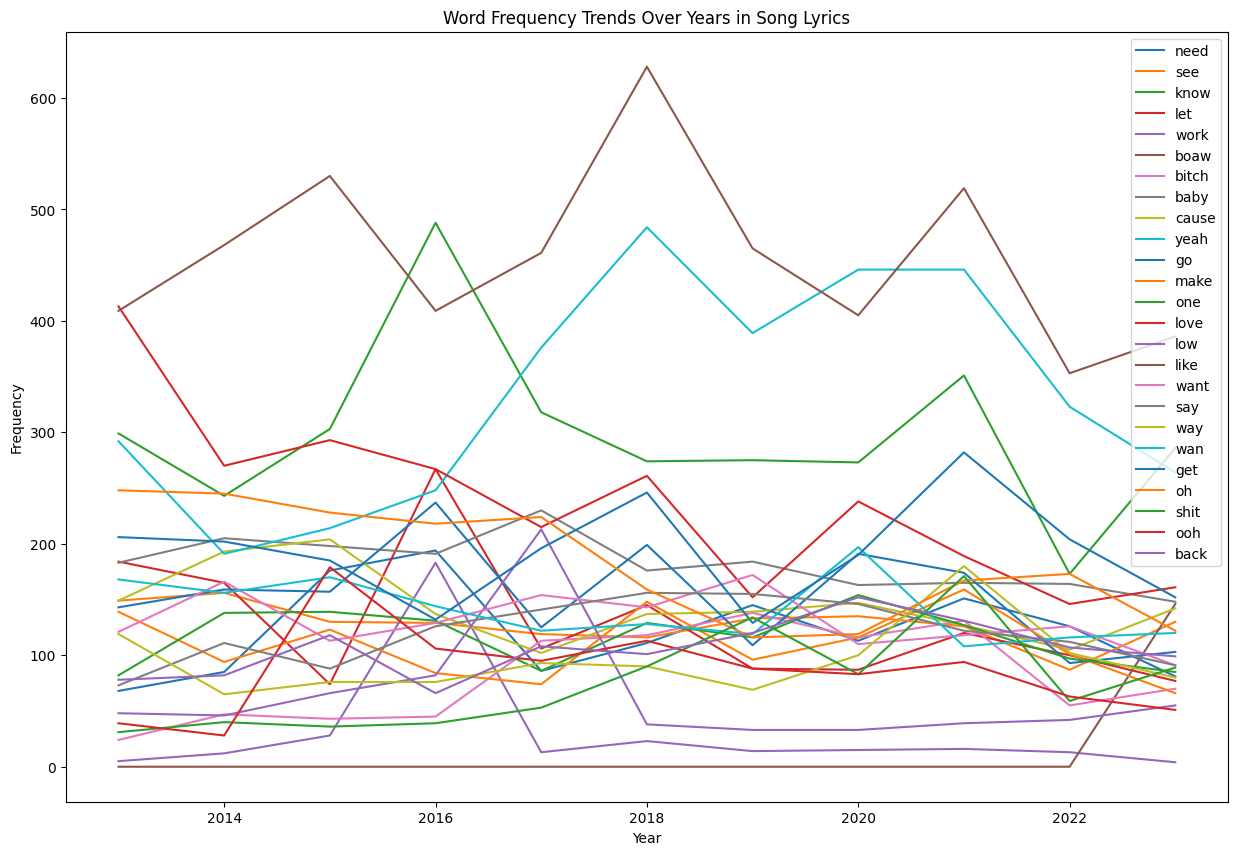

In [8]:
# Extracting top words over the years
top_words = set()
for year, words in yearly_word_freq.items():
    top_words.update([word for word, count in words.most_common(10)]) 

# Preparing data for plotting
plot_data = {word: [] for word in top_words}
years = sorted(yearly_word_freq.keys())

for year in years:
    for word in top_words:
        plot_data[word].append(yearly_word_freq[year][word])

# Plotting each word trend over the years
plt.figure(figsize=(15, 10))
for word, counts in plot_data.items():
    plt.plot(years, counts, label=word)

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Word Frequency Trends Over Years in Song Lyrics')
plt.legend()
plt.show()

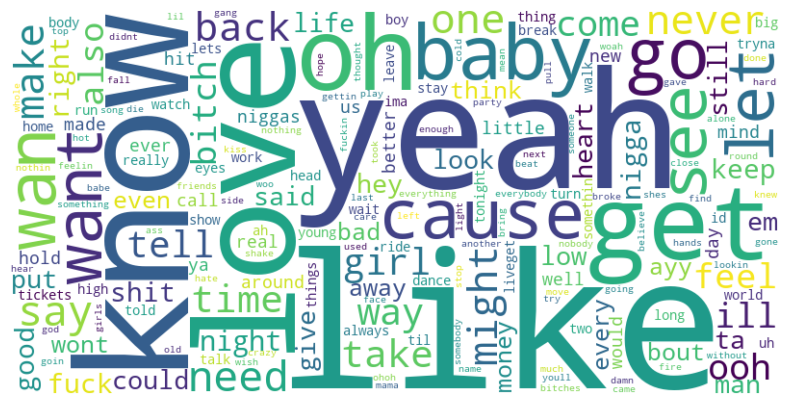

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'yearly_word_freq' contains the frequency of words for each year
# Aggregate word frequencies from all years
combined_word_freq = Counter()
for year in yearly_word_freq:
    combined_word_freq.update(yearly_word_freq[year])

# Convert to a dictionary for the word cloud generation
combined_words = dict(combined_word_freq)

# Generate a word cloud image for all years combined
wordcloud_all_years = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(combined_words)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all_years, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()


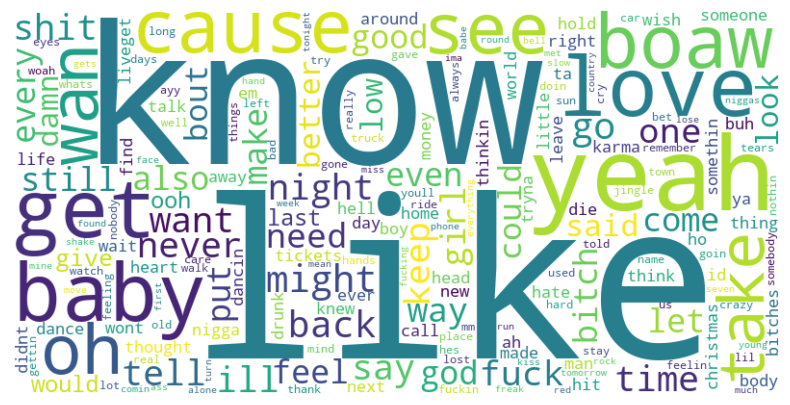

In [18]:
# Assuming 'yearly_word_freq' contains the frequency of words for each year
words_2023 = dict(yearly_word_freq[2023])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_2023)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

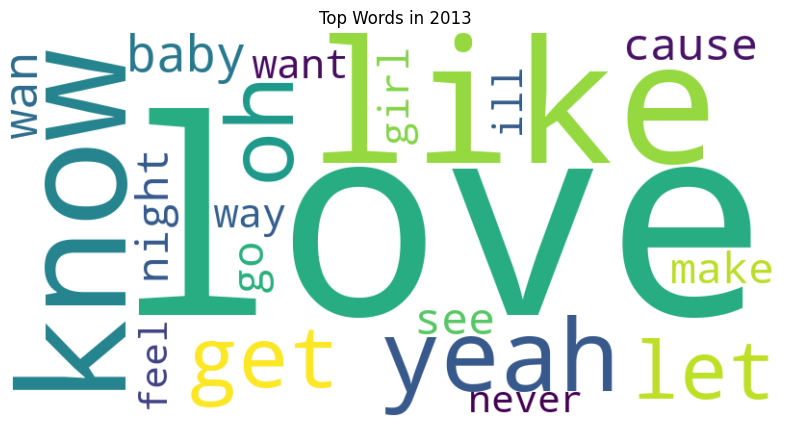

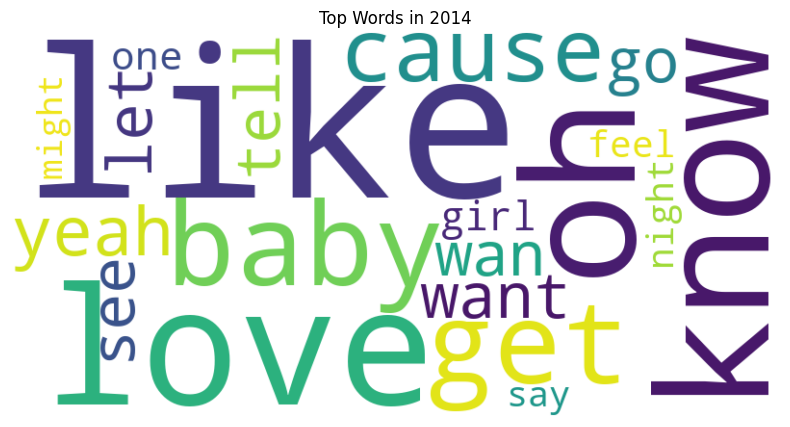

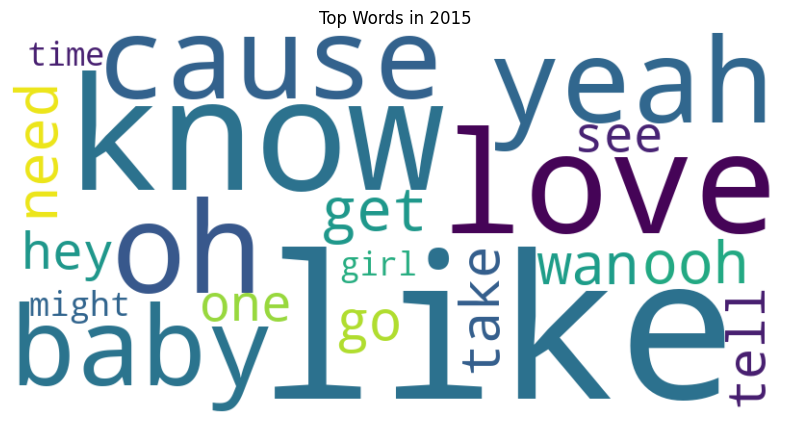

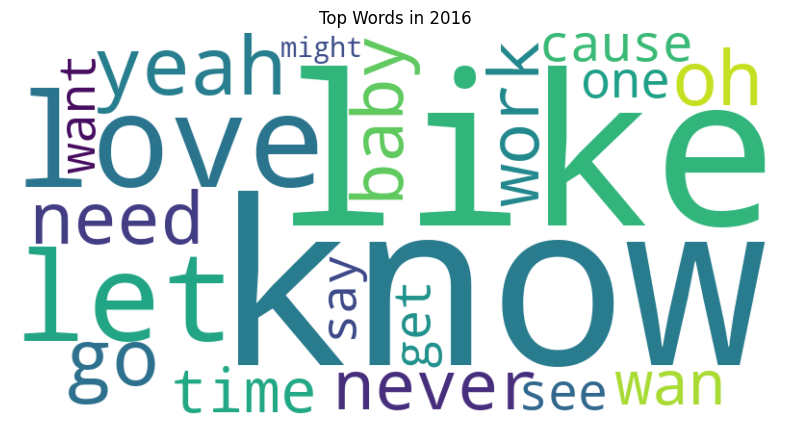

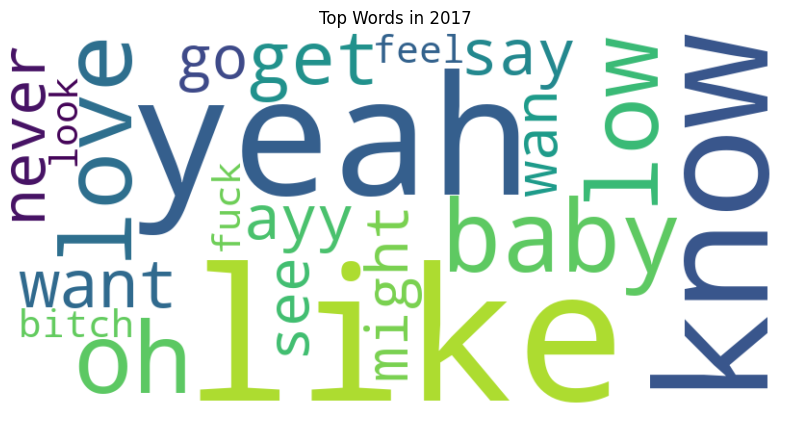

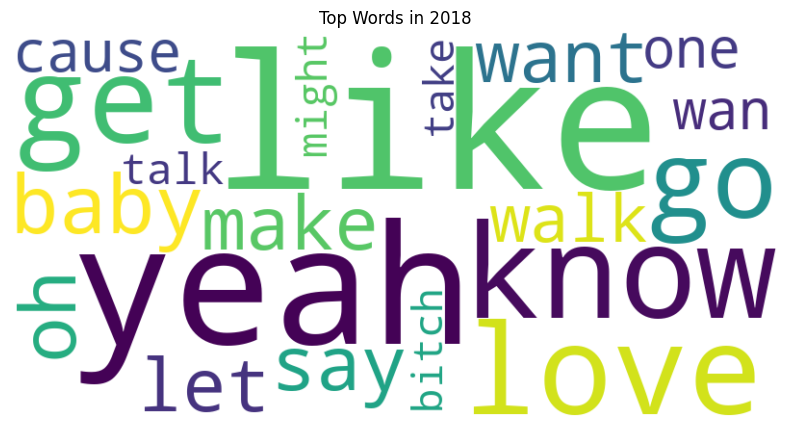

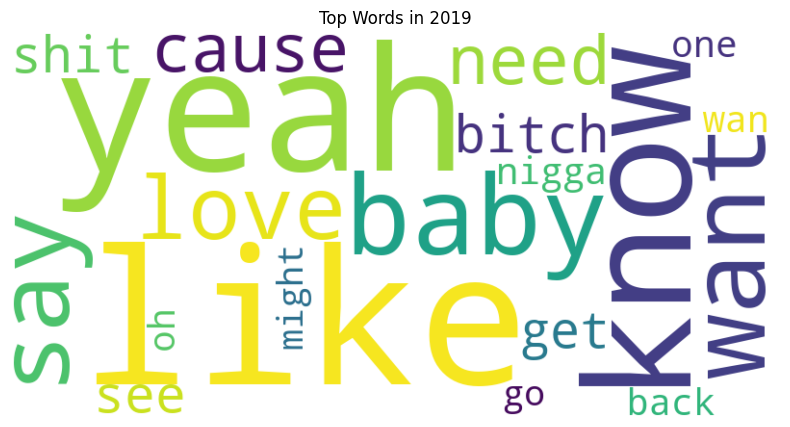

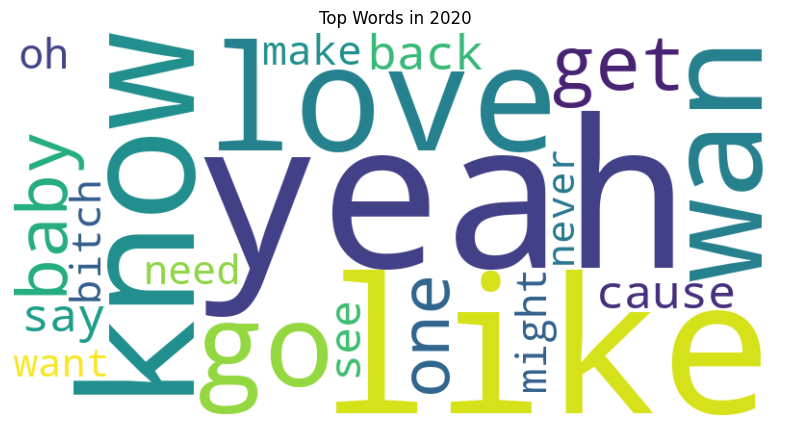

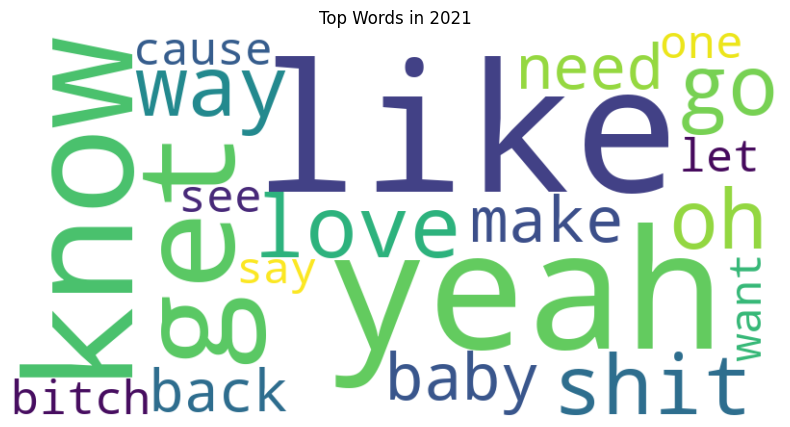

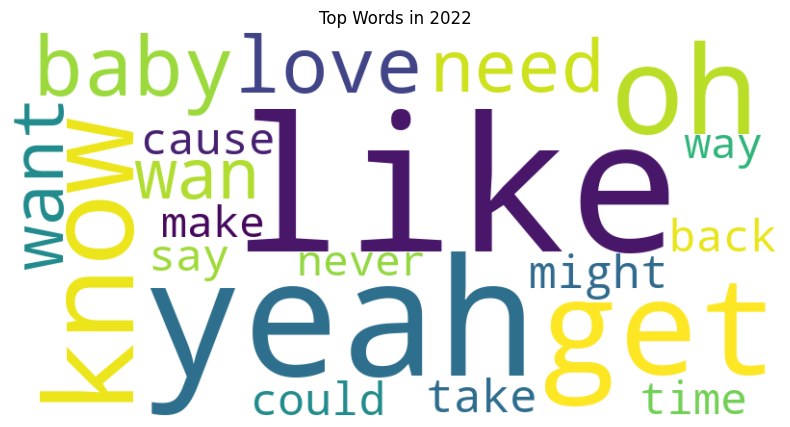

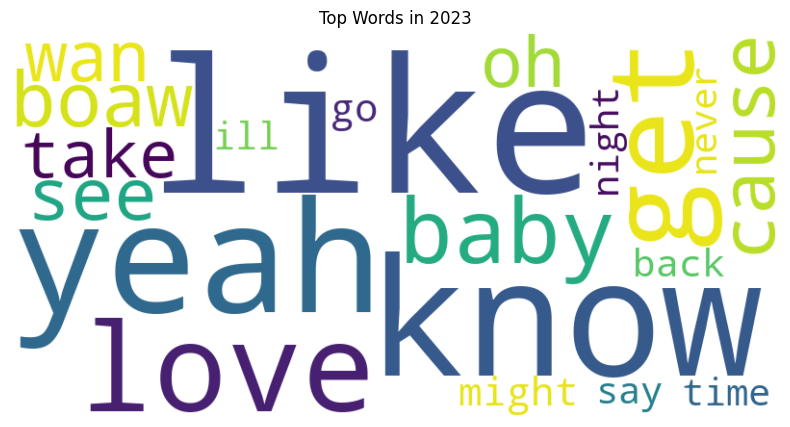

In [19]:
# For each year, generate a word cloud based on the top 20 words
for year in sorted(yearly_word_freq.keys()):
    # Get the top 20 words and their frequencies for the year
    top_words_dict = dict(yearly_word_freq[year].most_common(20))

    # Generate a word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words_dict)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Top Words in {year}")
    plt.axis('off')  # Turn off axis labels
    plt.show()

In [11]:
from IPython.display import clear_output, display, Image
from wordcloud import WordCloud
import io

# Function to create and display a word cloud image for a given year
def display_wordcloud(year):
    # Clear previous output
    clear_output(wait=True)
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(yearly_word_freq[year])
    # Convert to image
    img = io.BytesIO()
    wordcloud.to_image().save(img, format='PNG')
    # Display image
    display(Image(img.getvalue()))

# Create a slider for selecting the year
year_slider = widgets.IntSlider(
    value=min(yearly_word_freq.keys()),
    min=min(yearly_word_freq.keys()),
    max=max(yearly_word_freq.keys()),
    step=1,
    description='Year:',
    continuous_update=False
)

widgets.interactive(display_wordcloud, year=year_slider)


interactive(children=(IntSlider(value=2013, continuous_update=False, description='Year:', max=2023, min=2013),…

# Sentiment Analysis

## Analysing Sentiments over the Years

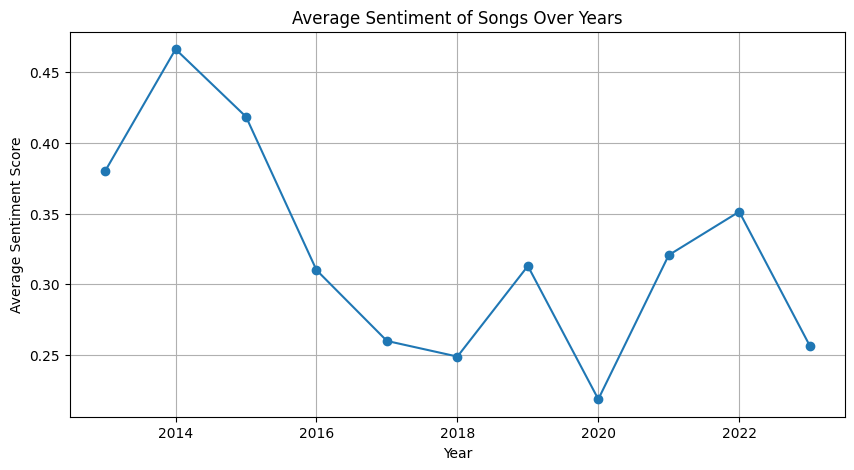

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment score
def calculate_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Apply the function to calculate sentiment for each song's lyrics
cleaned_df['sentiment'] = cleaned_df['cleaned_lyrics_v3'].apply(calculate_sentiment)

# Group by year and calculate the average sentiment per year
average_sentiment_by_year = cleaned_df.groupby('Year')['sentiment'].mean().reset_index()

# Now plot the average sentiment per year
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(average_sentiment_by_year['Year'], average_sentiment_by_year['sentiment'], marker='o')
plt.title('Average Sentiment of Songs Over Years')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()


In [23]:
# Initialize a dictionary to hold the song with highest and lowest sentiment for each year
extreme_sentiments_by_year = {}

# Loop through each year
for year in sorted(cleaned_df['Year'].unique()):
    # Filter the DataFrame for the current year
    year_df = cleaned_df[cleaned_df['Year'] == year]
    
    # Find the song with the highest sentiment
    highest_sentiment_song = year_df.loc[year_df['sentiment'].idxmax()]
    
    # Find the song with the lowest sentiment
    lowest_sentiment_song = year_df.loc[year_df['sentiment'].idxmin()]
    
    # Add to the dictionary
    extreme_sentiments_by_year[year] = {
        'Highest': {'Title': highest_sentiment_song['Title'], 'Artist': highest_sentiment_song['Artist'], 'Sentiment': highest_sentiment_song['sentiment']},
        'Lowest': {'Title': lowest_sentiment_song['Title'], 'Artist': lowest_sentiment_song['Artist'], 'Sentiment': lowest_sentiment_song['sentiment']}
    }

# Print out the results
for year, sentiments in extreme_sentiments_by_year.items():
    print(f"Year: {year}")
    print(f"Highest Sentiment: {sentiments['Highest']['Title']} by {sentiments['Highest']['Artist']}, Score: {sentiments['Highest']['Sentiment']}")
    print(f"Lowest Sentiment: {sentiments['Lowest']['Title']} by {sentiments['Lowest']['Artist']}, Score: {sentiments['Lowest']['Sentiment']}\n")


Year: 2013
Highest Sentiment: Mirrors by Justin Timberlake, Score: 0.9999
Lowest Sentiment: I Love It by Icona Pop Featuring Charli XCX, Score: -0.9993

Year: 2014
Highest Sentiment: Cool Kids by Echosmith, Score: 0.9996
Lowest Sentiment: Shake It Off by Taylor Swift, Score: -0.9997

Year: 2015
Highest Sentiment: Can't Feel My Face by The Weeknd, Score: 0.9994
Lowest Sentiment: Shake It Off by Taylor Swift, Score: -0.9997

Year: 2016
Highest Sentiment: Gold by Kiiara, Score: 0.9997
Lowest Sentiment: Wicked by Future, Score: -0.9998

Year: 2017
Highest Sentiment: Shape Of You by Ed Sheeran, Score: 0.9995
Lowest Sentiment: All Time Low by Jon Bellion, Score: -0.9999

Year: 2018
Highest Sentiment: Girls Like You by Maroon 5 Featuring Cardi B, Score: 0.9998
Lowest Sentiment: Gummo by 6ix9ine, Score: -0.9995

Year: 2019
Highest Sentiment: Thank U, Next by Ariana Grande, Score: 0.9996
Lowest Sentiment: Murder On My Mind by YNW Melly, Score: -0.9998

Year: 2020
Highest Sentiment: Come & Go by

In [24]:
# Initialize variables to hold the song with the absolute highest and lowest sentiment
highest_sentiment_overall = {'Title': None, 'Artist': None, 'Sentiment': -1}  # Start with the lowest possible sentiment score
lowest_sentiment_overall = {'Title': None, 'Artist': None, 'Sentiment': 1}   # Start with the highest possible sentiment score

# Loop through each item in the extreme sentiments dictionary
for year, sentiments in extreme_sentiments_by_year.items():
    # Check if the current year's highest sentiment is greater than the overall highest sentiment
    if sentiments['Highest']['Sentiment'] > highest_sentiment_overall['Sentiment']:
        highest_sentiment_overall = sentiments['Highest']
    
    # Check if the current year's lowest sentiment is less than the overall lowest sentiment
    if sentiments['Lowest']['Sentiment'] < lowest_sentiment_overall['Sentiment']:
        lowest_sentiment_overall = sentiments['Lowest']

# Print out the overall highest and lowest sentiment songs
print(f"Song with the highest sentiment score over all years: {highest_sentiment_overall['Title']} by {highest_sentiment_overall['Artist']}, Score: {highest_sentiment_overall['Sentiment']}")
print(f"Song with the lowest sentiment score over all years: {lowest_sentiment_overall['Title']} by {lowest_sentiment_overall['Artist']}, Score: {lowest_sentiment_overall['Sentiment']}")


Song with the highest sentiment score over all years: Mirrors by Justin Timberlake, Score: 0.9999
Song with the lowest sentiment score over all years: All Time Low by Jon Bellion, Score: -0.9999


In [25]:
# Initialize variables to hold the song with the absolute highest and lowest sentiment
highest_sentiment_overall = {'Year': None, 'Title': None, 'Artist': None, 'Sentiment': -1}  # Start with the lowest possible sentiment score
lowest_sentiment_overall = {'Year': None, 'Title': None, 'Artist': None, 'Sentiment': 1}   # Start with the highest possible sentiment score

# Loop through each item in the extreme sentiments dictionary
for year, sentiments in extreme_sentiments_by_year.items():
    # Check if the current year's highest sentiment is greater than the overall highest sentiment
    if sentiments['Highest']['Sentiment'] > highest_sentiment_overall['Sentiment']:
        highest_sentiment_overall = {
            'Year': year,
            'Title': sentiments['Highest']['Title'],
            'Artist': sentiments['Highest']['Artist'],
            'Sentiment': sentiments['Highest']['Sentiment']
        }
    
    # Check if the current year's lowest sentiment is less than the overall lowest sentiment
    if sentiments['Lowest']['Sentiment'] < lowest_sentiment_overall['Sentiment']:
        lowest_sentiment_overall = {
            'Year': year,
            'Title': sentiments['Lowest']['Title'],
            'Artist': sentiments['Lowest']['Artist'],
            'Sentiment': sentiments['Lowest']['Sentiment']
        }

# Print out the overall highest and lowest sentiment songs along with the year they came out
print(f"Song with the highest sentiment score over all years: '{highest_sentiment_overall['Title']}' by {highest_sentiment_overall['Artist']} in {highest_sentiment_overall['Year']}, Score: {highest_sentiment_overall['Sentiment']}")
print(f"Song with the lowest sentiment score over all years: '{lowest_sentiment_overall['Title']}' by {lowest_sentiment_overall['Artist']} in {lowest_sentiment_overall['Year']}, Score: {lowest_sentiment_overall['Sentiment']}")


Song with the highest sentiment score over all years: 'Mirrors' by Justin Timberlake in 2013, Score: 0.9999
Song with the lowest sentiment score over all years: 'All Time Low' by Jon Bellion in 2017, Score: -0.9999


In [17]:
# Filter the DataFrame for the song with the lowest sentiment in 2023
song_lyrics = cleaned_df[(cleaned_df['Title'] == 'Shake It Off') & (cleaned_df['Artist'].str.contains('Taylor Swift'))]['cleaned_lyrics_v3'].iloc[0]

print(f"Lyrics for 'Shake It Off' by Taylor Swift:\n{song_lyrics}")

Lyrics for 'Shake It Off' by Taylor Swift:
I stay out too late
Got nothin' in my brain
That's what people say, mm-mm
That's what people say, mm-mm
I go on too many dates 
But I can't make them stay
At least, that's what people say, mm-mm
That's what people say, mm-mm


But I keep cruisin'
Can't stop, won't stop movin'
It's like I got this music in my mind
Sayin', "It's gonna be alright"


'Cause the players gonna play, play, play, play, play
And the haters gonna hate, hate, hate, hate, hate
Baby, I'm just gonna shake, shake, shake, shake, shake
I shake it off, I shake it off
Heartbreakers gonna break, break, break, break, break
And the fakers gonna fake, fake, fake, fake, fake
Baby, I'm just gonna shake, shake, shake, shake, shake
I shake it off, I shake it off
See Taylor Swift LiveGet tickets as low as $You might also like
I never miss a beat
I'm lightnin' on my feet
And that's what they don't see, mm-mm
That's what they don't see, mm-mm
I'm dancin' on my own 
I make the moves up as I

In [26]:
# Filter the DataFrame for the song 
song_lyrics = cleaned_df[(cleaned_df['Title'] == 'Mirrors') & (cleaned_df['Artist'].str.contains('Justin Timberlake'))]['cleaned_lyrics_v3'].iloc[0]

print(f"Lyrics for 'Mirrors' by Justin Timberlake:\n{song_lyrics}")

Lyrics for 'Mirrors' by Justin Timberlake:
Aren't you somethin' to admire?
'Cause your shine is somethin' like a mirror
And I can't help but notice
You reflect in this heart of mine
If you ever feel alone and
The glare makes me hard to find
Just know that I'm always
Parallel on the other side


'Cause with your hand in my hand and a pocket full of soul
I can tell you there's no place we couldn't go
Just put your hand on the glass
I'll be tryna pull you through
You just gotta be strong


'Cause I don't wanna lose you now
I'm lookin' right at the other half of me
The vacancy that sat in my heart
Is a space that now you hold
Show me how to fight for now
And I'll tell you, baby, it was easy
Comin' back here to you once I figured it out
You were right here all along

It's like you're my mirror 
My mirror's staring back at me  
I couldn't get any bigger 
With anyone else beside me 
And now it's clear as this promise
That we're making
Two reflections into one
'Cause it's like you're my mirror

In [27]:
# Filter the DataFrame for the song 
song_lyrics = cleaned_df[(cleaned_df['Title'] == 'All Time Low') & (cleaned_df['Artist'].str.contains('Jon Bellion'))]['cleaned_lyrics_v3'].iloc[0]

print(f"Lyrics for 'All Time Low' by Jon Bellion:\n{song_lyrics}")

Lyrics for 'All Time Low' by Jon Bellion:
I was the knight in shining armor in your movie
Would put your lips on mine and love the aftertaste
Now I'm a ghost, I call your name, you look right through me
You're the reason I'm alone and masturbate


I, I've been trying to fix my pride
But that shit's broken, that shit's broken
Lie, lie, l-lie I tried to hide
But now you know it

That I'm at an all time
Low, low, low, low, low, low, low, low, low
Low, low, low, low, low, low, low, low, low
Low, low, low, low, low, low, low, low, low
Low, low, low, low, low, low, low, low, low


I was the prototype like  Stacks on that CD
An example of the perfect candidate
Now, all your girlfriends say that you don't want to see me
You're the reason that I just can't concentrate


I,  I've been trying to fix my pride
But that shit's broken, that shit's broken
Lie , lie, in the light I tried to hide
But now you know it
You might also like
That I'm at an all time
Low, low, low, low, low, low, low, low, low


In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize

sia = SentimentIntensityAnalyzer()

# Assuming 'song_lyrics' contains the lyrics for 'Mirrors' by Justin Timberlake
# Breaking the lyrics into sentences
lyrics_sentences = tokenize.sent_tokenize(song_lyrics)

# Analyzing the sentiment of each sentence
sentences_sentiment = [(sentence, sia.polarity_scores(sentence)) for sentence in lyrics_sentences]

# Sorting sentences based on their compound sentiment score
sorted_sentences_sentiment = sorted(sentences_sentiment, key=lambda x: x[1]['compound'], reverse=True)

# Display the sentence with the highest positive sentiment score
print("Sentence with the highest positive sentiment score:")
print(sorted_sentences_sentiment[0])

# Display the sentence with the highest negative sentiment score (if any)
negative_sentences = [s for s in sorted_sentences_sentiment if s[1]['compound'] < 0]
if negative_sentences:
    print("\nSentence with the highest negative sentiment score:")
    print(negative_sentences[0])
else:
    print("\nNo sentence with a negative sentiment score was found.")


Sentence with the highest positive sentiment score:
('Low, low, low, low, low, low, low, low, low\nLow, low, low, low, low, low, low, low, low\nLow, low, low, low, low, low, low, low, low\nLow, low, low, low, low, low, low, low, low\nLow, low, low, low, low, low, low, low, low\nLow, low, low, low, low, low, low, low, low\nLow, low, low, low, low, low, low, low, low\nLow, low, low, low, low, low, low, low, low', {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.9988})

Sentence with the highest negative sentiment score:
('Low, low, low, low, low, low, low, low, low\nLow, low, low, low, low, low, low, low, low\nLow, low, low, low, low, low, low, low, low\nLow, low, low, low, low, low, low, low, low\nLow, low, low, low, low, low, low, low, low\nLow, low, low, low, low, low, low, low, low\nLow, low, low, low, low, low, low, low, low\nLow, low, low, low, low, low, low, low, low', {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.9988})
